In [335]:
import math
import time
import matplotlib.pyplot as plt

In [336]:
def checking_string(input_string, forbidden_symbols):
    for i in input_string:
        if(i in forbidden_symbols):
            raise Exception()
    return input_string

In [337]:
def changing_symbols(input_string, symbols_to_change):
    new_str = ""
    for i in input_string:
        if(i in symbols_to_change.keys()):
            new_str += symbols_to_change[i]
        else:
            new_str += i
    return new_str

In [338]:
def cleaning_Heading_symbols_and_other_things(input_string, symbols_to_remove):
    temp = str.lower(input_string)
    for symbol in symbols_to_remove:
        temp = temp.replace(symbol, "")
    return temp

In [339]:
def get_k_gramms(str, k):
    k_gramms = dict()
    for i in range(0, len(str)-k+1):
        if(str[i:i+k] in k_gramms.keys()):
            k_gramms[str[i:i+k]] += 1
        else:
            k_gramms[str[i:i+k]] = 1
    return k_gramms


In [340]:
def model_of_opened_text(text, k):
    H = 0
    gramms = get_k_gramms(text, k)
    for i in gramms:
        p = gramms[i]/sum(gramms.values())
        H += p * math.log2(p)
    H *= -1
    return H

In [341]:
k = 5
str_ = """«Мильоны – вас. Нас – тьмы, и тьмы, и тьмы. Попробуйте, сразитесь  с нами! Да, скифы – мы! Да, азиаты – мы, С раскосыми и жадными очами! Для вас – века, для нас – единый час. Мы, как послушные холопы, Держали щит меж двух враждебных рас Монголов и Европы!»"""
symbols_to_remove = ["«", "»", ".","-","–",","," ","!"]
symbols_to_change = {"ё": "е"}
graph = {}
forbidden_symbols = [":","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","0","1","2","3","4","5","6","7","8","9"]

«Мильоны – вас. Нас – тьмы, и тьмы, и тьмы. Попробуйте, сразитесь  с нами! Да, скифы – мы! Да, азиаты – мы, С раскосыми и жадными очами! Для вас – века, для нас – единый час. Мы, как послушные холопы, Держали щит меж двух враждебных рас Монголов и Европы!»

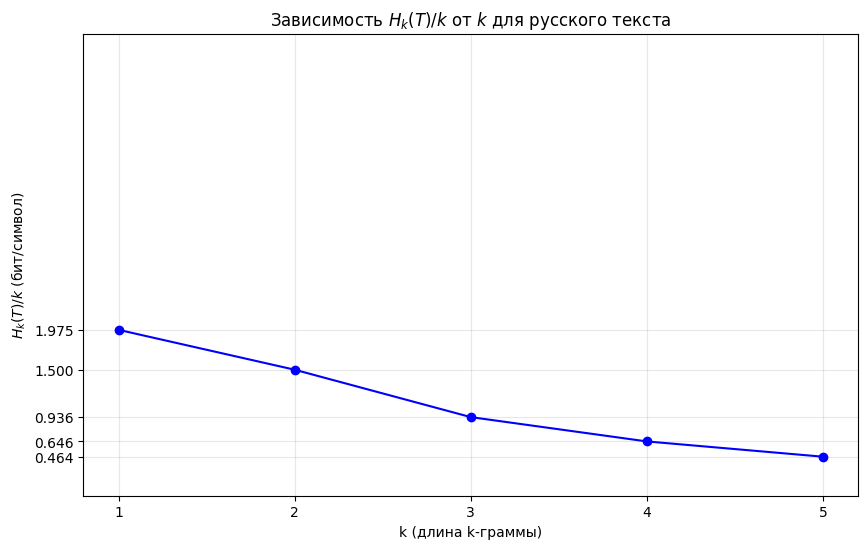

In [342]:
while(True):
    result = str(input("Модель открытого текста. Чтобы выбрать ввод слова нажмите 1. Чтобы вывести график (если вы уже вводили текст) нажмите 2. Чтобы выйти из программы нажмите 3. "))
    if(result == "1"):
        while(True):
            try:
                input_string = str(input("Вводите свою строку (если хотите выйти из программы, то напишите 1): "))
                if(input_string == "1"):
                    break
                checking_string(input_string, forbidden_symbols)
                break
            except Exception:
                temp = str(input("Вы ввели некорректную строку. Для повторения ввода нажмите Enter."))
        if(input_string == "1"):
            continue
        input_string = changing_symbols(cleaning_Heading_symbols_and_other_things(input_string, symbols_to_remove), symbols_to_change)
        for i in range(1, k+1):
            graph[i] = model_of_opened_text(input_string, i)/i
        while(True):
            res = str(input("Необходимо ли вам вывести график? Если да, пишите 1. Если нет - пишите 2."))
            if(res == "1"):
                plt.figure(figsize=(10, 6))
                plt.plot(graph.keys(), graph.values(), marker='o', linestyle='-', color='b')
                plt.title('Зависимость $H_k(T)/k$ от $k$ для русского текста')
                plt.xlabel('k (длина k-граммы)')
                plt.ylabel('$H_k(T)/k$ (бит/символ)')
                plt.grid(True, alpha=0.3)
                plt.xticks(list(graph.keys()))
                plt.yticks(list(graph.values()))
                plt.ylim(0, max(graph) * 1.1)
                plt.show()
                temp = str(input("Для выхода нажмите Enter."))
                break
            elif(res == "2"):
                break
    elif(result == "2"):
        if(len(list(graph.keys())) > 0):
            plt.figure(figsize=(10, 6))
            plt.plot(graph.keys(), graph.values(), marker='o', linestyle='-', color='b')
            plt.title('Зависимость $H_k(T)/k$ от $k$ для русского текста')
            plt.xlabel('k (длина k-граммы)')
            plt.ylabel('$H_k(T)/k$ (бит/символ)')
            plt.grid(True, alpha=0.3)
            plt.xticks(list(graph.keys()))
            plt.yticks(list(graph.values()))
            plt.ylim(0, max(graph) * 1.1)
            plt.show()
            temp = str(input("Для выхода нажмите Enter."))
        else:
            temp = str(input("Нет сохраненного графика. Для выхода нажмите Enter."))
    elif(result == "3"):
        break